\centerline{\textbf{ Niels Clayton - 300437590}}

# Question 1

## Introduction

Import the matrix from the "matrix.mtx" file.

## Procedure

using the scipy.io.mmread() function, we import the matrix
from the "matrix.mtx" file, and then we convert it to a
numpy array for ease of use. 


In [1]:
from _curses import error
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sci


In [3]:
def load():
    return sci.mmread("matrix1.mtx").toarray()


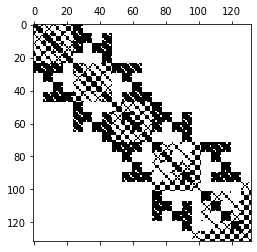

In [4]:
A = load()
plt.spy(A)
plt.show()


## Observations & discussion

It can be observed that the file is correctly imported,
and that the matrix plotted above is the same as the one 
from the assignment script. I have made the loading of the 
file into a function so that it can be loaded more easily
since it must be loaded multiple times.

## Conclusions

The loading of the file was successful.


# Question 2


## Introduction

Implement the cholesky and band_cholesky factorisation
algorithms in python.

## Procedure

Implement the chelesky factorisation algorithm, taking in the matrix 
as argument A


In [5]:
def cholesky(A1):
    A = A1.copy()
    n = len(A)

    for i in range(n):

        try:
            A[i, i] = np.sqrt(A[i, i] - np.dot(A[i, 0:i], A[i, 0:i]))
        except ValueError:
            error.err('Matrix is not positive definite')


        for j in range(i + 1, n):
            A[j, i] = (A[j, i] - np.dot(A[j, 0:i], A[i, 0:i])) / A[i, i]

    for k in range(1, n):
        A[0:k, k] = 0.0

    return A


Implement the band_chelesky factorisation algorithm, taking in the matrix 
as argument A, and the bandwidth of the matrix p

In [6]:
def band_cholesky(A1, p):
    A = A1.copy()
    n = len(A)

    for j in range(n):
        
        try:
            A[j, j] = np.sqrt(A[j, j] - np.dot(A[j, 0:j], A[j, 0:j]))
        except ValueError:
            error.err('Matrix is not positive definite')


        for k in range( max(0, j-p), j):
            lam = min(k+p, n-1)
            A[j:lam+1, j] = A[j:lam+1, j] - np.dot(A[j, k], A[j:lam+1, k])

        lam = min(j+p, n-1)
        A[j:lam+1, j] = A[j:lam+1, j] / np.sqrt(abs(A[j,j]))

    for k in range(1, n):
        A[0:k, k] = 0.0

    return A


## Observations & Discussion

These functions are quite similar in principle, with the main 
difference being that the band_cholesky function will only compute the 
values within the  given band denoted by the input parameter p. This 
results in the removal of redundant calculation, resulting in a less
computationally intensive algorithm.

## Conclusions

It can be concluded that the two algorithms will produce very similar 
results, however the band_cholesky algorithm will be more efficient in
its calculations.



# Question 3


## Introduction



## Procedure


In [7]:

def inverse_cholesky(L1):
    L = L1.copy()
    L_T = np.transpose(L)
    return np.matmul(L, L_T)


/usr/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  


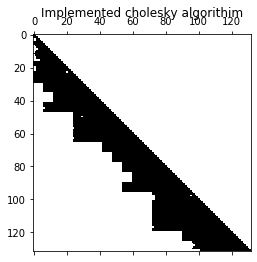

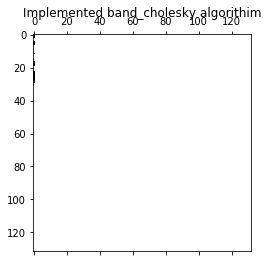

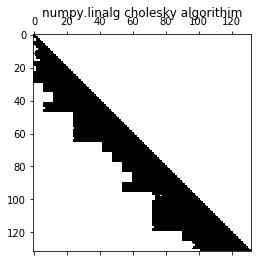

In [9]:

L1 = cholesky(A)
L2 = band_cholesky(A,48)
L3 = np.linalg.cholesky(A)

plt.spy(L1)
plt.title("Implemented cholesky algorithim")
plt.show()

plt.spy(L2)
plt.title("Implemented band_cholesky algorithim")
plt.show()

plt.spy(L3)
plt.title("numpy.linalg cholesky algorithim")
plt.show()


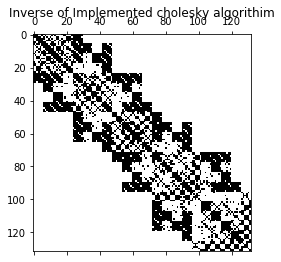

error relative to original matrix: -5.960464477539063e-08
error relative to original matrix: nan
error relative to original matrix: -5.960464477539063e-08


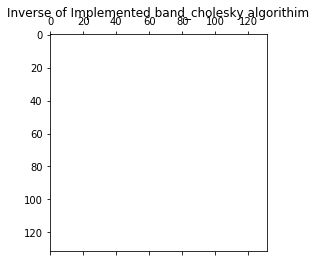

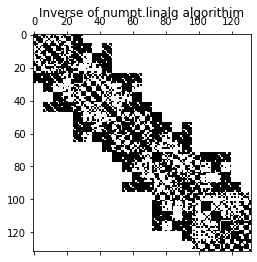

In [10]:

L1_inverse = inverse_cholesky(L1)
L2_inverse = inverse_cholesky(L2)
L3_inverse = inverse_cholesky(L3)

plt.spy(L1_inverse)
plt.title("Inverse of Implemented cholesky algorithim")
plt.show()
error = abs(np.sum(A))-abs(np.sum(L1_inverse))
print("error relative to original matrix: {}".format(error))

plt.spy(L2_inverse)
plt.title("Inverse of Implemented band_cholesky algorithim")
plt.show()
error = abs(np.sum(A))-abs(np.sum(L2_inverse))
print("error relative to original matrix: {}".format(error))

plt.spy(L3_inverse)
plt.title("Inverse of numpt.linalg algorithim")
plt.show()
error = abs(np.sum(A))-abs(np.sum(L3_inverse))
print("error relative to original matrix: {}".format(error))
